# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import time
import json
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sb 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Import API key
from api_keys import g_key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

## Generate Cities List

In [3]:
lat = np.random.uniform(low=-90, high=90, size=1000)
lng = np.random.uniform(low=-180, high=180, size=1000)
lat_lng = zip(lat, lng)
LL = list(lat_lng)

In [4]:
cities = []

for x in LL:
    cities.append(citipy.nearest_city(x[0], x[1]).city_name)
    
len(cities)

1000

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
n = 1
for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    response = requests.get(url)
    if response.status_code == 200:
        print(f'Processing Record {n} of {len(cities)} | {city}')
        n=n+1
    else:
        print('City not found. Skipping...')

Processing Record 1 of 1000 | dutlwe
Processing Record 2 of 1000 | punta arenas
Processing Record 3 of 1000 | arraial do cabo
Processing Record 4 of 1000 | dolores
Processing Record 5 of 1000 | saldanha
Processing Record 6 of 1000 | hofn
Processing Record 7 of 1000 | springbok
Processing Record 8 of 1000 | punta arenas
Processing Record 9 of 1000 | salalah
Processing Record 10 of 1000 | rikitea
Processing Record 11 of 1000 | naze
Processing Record 12 of 1000 | vaini
Processing Record 13 of 1000 | albany
Processing Record 14 of 1000 | port elizabeth
Processing Record 15 of 1000 | salta
Processing Record 16 of 1000 | prince george
Processing Record 17 of 1000 | ilulissat
Processing Record 18 of 1000 | hithadhoo
Processing Record 19 of 1000 | imbituba
Processing Record 20 of 1000 | soni
Processing Record 21 of 1000 | lompoc
Processing Record 22 of 1000 | nago
Processing Record 23 of 1000 | souillac
Processing Record 24 of 1000 | cape town
Processing Record 25 of 1000 | puerto madryn
Proce

Processing Record 196 of 1000 | hilo
Processing Record 197 of 1000 | trelew
Processing Record 198 of 1000 | rocha
Processing Record 199 of 1000 | punta arenas
Processing Record 200 of 1000 | cape town
Processing Record 201 of 1000 | torbay
Processing Record 202 of 1000 | torbay
Processing Record 203 of 1000 | belmonte
Processing Record 204 of 1000 | sandpoint
City not found. Skipping...
Processing Record 205 of 1000 | lakes entrance
Processing Record 206 of 1000 | yellowknife
Processing Record 207 of 1000 | zinder
City not found. Skipping...
Processing Record 208 of 1000 | bisho
Processing Record 209 of 1000 | vilhena
Processing Record 210 of 1000 | puerto ayora
Processing Record 211 of 1000 | thompson
Processing Record 212 of 1000 | birkeland
Processing Record 213 of 1000 | busselton
Processing Record 214 of 1000 | ancud
Processing Record 215 of 1000 | albany
Processing Record 216 of 1000 | ushuaia
Processing Record 217 of 1000 | longyearbyen
City not found. Skipping...
Processing Rec

Processing Record 384 of 1000 | atuona
Processing Record 385 of 1000 | rikitea
Processing Record 386 of 1000 | ushuaia
Processing Record 387 of 1000 | ushuaia
Processing Record 388 of 1000 | new norfolk
Processing Record 389 of 1000 | santa rosa
Processing Record 390 of 1000 | pesochnoye
Processing Record 391 of 1000 | qaanaaq
Processing Record 392 of 1000 | rikitea
Processing Record 393 of 1000 | punta arenas
Processing Record 394 of 1000 | kaitangata
Processing Record 395 of 1000 | abalak
Processing Record 396 of 1000 | maniitsoq
Processing Record 397 of 1000 | menongue
Processing Record 398 of 1000 | seoul
Processing Record 399 of 1000 | hobart
Processing Record 400 of 1000 | provideniya
Processing Record 401 of 1000 | flinders
Processing Record 402 of 1000 | port alfred
Processing Record 403 of 1000 | provideniya
Processing Record 404 of 1000 | tuktoyaktuk
Processing Record 405 of 1000 | kutum
Processing Record 406 of 1000 | barrow
Processing Record 407 of 1000 | lerwick
Processing

Processing Record 573 of 1000 | kodiak
Processing Record 574 of 1000 | morehead
Processing Record 575 of 1000 | pak phanang
Processing Record 576 of 1000 | raudeberg
Processing Record 577 of 1000 | hermanus
Processing Record 578 of 1000 | bosanska krupa
Processing Record 579 of 1000 | albany
Processing Record 580 of 1000 | codajas
Processing Record 581 of 1000 | longyearbyen
Processing Record 582 of 1000 | nemuro
Processing Record 583 of 1000 | saint-philippe
City not found. Skipping...
City not found. Skipping...
Processing Record 584 of 1000 | cherskiy
Processing Record 585 of 1000 | ushuaia
Processing Record 586 of 1000 | hermanus
City not found. Skipping...
City not found. Skipping...
Processing Record 587 of 1000 | ushuaia
Processing Record 588 of 1000 | bambous virieux
Processing Record 589 of 1000 | arraial do cabo
Processing Record 590 of 1000 | dikson
Processing Record 591 of 1000 | teya
City not found. Skipping...
Processing Record 592 of 1000 | arraial do cabo
Processing Rec

Processing Record 756 of 1000 | palestine
Processing Record 757 of 1000 | santa cruz do capibaribe
Processing Record 758 of 1000 | bredasdorp
Processing Record 759 of 1000 | ushuaia
Processing Record 760 of 1000 | mataura
Processing Record 761 of 1000 | eston
Processing Record 762 of 1000 | whitley bay
Processing Record 763 of 1000 | guerrero negro
Processing Record 764 of 1000 | kapaa
Processing Record 765 of 1000 | kodiak
Processing Record 766 of 1000 | ushuaia
City not found. Skipping...
Processing Record 767 of 1000 | iqaluit
Processing Record 768 of 1000 | rikitea
Processing Record 769 of 1000 | sur
Processing Record 770 of 1000 | ushuaia
Processing Record 771 of 1000 | promyshlennaya
Processing Record 772 of 1000 | tasiilaq
Processing Record 773 of 1000 | sao lourenco do sul
Processing Record 774 of 1000 | mar del plata
Processing Record 775 of 1000 | atuona
Processing Record 776 of 1000 | blackwater
Processing Record 777 of 1000 | jamestown
Processing Record 778 of 1000 | lening

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
os.path

<module 'posixpath' from '/Users/nicolepipkins/opt/anaconda3/envs/nicole/lib/python3.8/posixpath.py'>

In [18]:
newcities = []
lat = []
lng = []
temp = []
humidity = []
cloud = []
wind = []
country = []
date = []

for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    response = requests.get(url)
    data = response.json()
    if response.status_code == 200:
        newcities.append(data["name"])
        lat.append(data["coord"]["lat"])
        lng.append(data["coord"]["lon"])
        temp.append(data["main"]["temp_max"])
        humidity.append(data["main"]["humidity"])
        cloud.append(data["clouds"]["all"])
        wind.append(data["wind"]["speed"])
        country.append(data["sys"]["country"])
        date.append(data["dt"])

cities_df = pd.DataFrame({
            "City": newcities,
            "Lat": lat,
            "Lng": lng,
            "Max Temp": temp,
            "Humidity": humidity,
            "Cloudiness": cloud,
            "Wind Speed": wind,
            "Country": country,
            "Date": date})

cities_df.to_csv('/Users/nicolepipkins/Desktop/Homework6_PythonAPI/output_data/cities.csv', index=False)
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dutlwe,-23.98,23.90,290.59,22,1,7.60,BW,1600295331
1,Punta Arenas,-53.15,-70.92,277.15,80,90,6.70,CL,1600294784
2,Arraial do Cabo,-22.97,-42.03,296.15,83,55,8.20,BR,1600294784
3,Dolores,-36.31,-57.68,285.31,67,42,1.45,AR,1600294784
4,Saldanha,-33.01,17.94,287.15,87,55,2.60,ZA,1600294879


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [20]:
cities_df['Humidity'].max()

100

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [45]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,9.240000e+02
mean,5.459513,-6.028290,289.330866,72.822511,51.097403,4.607846,1.600295e+09
std,41.406454,102.094831,8.833043,17.230918,37.657912,2.640671,2.405541e+02
min,-54.800000,-179.170000,264.710000,3.000000,0.000000,0.400000,1.600295e+09
25%,-33.650000,-76.292500,282.040000,63.000000,13.000000,2.430000,1.600295e+09
50%,-0.740000,-18.685000,289.590000,76.000000,47.000000,4.140000,1.600295e+09
75%,42.600000,88.400000,296.250000,87.000000,90.000000,6.700000,1.600295e+09
max,78.220000,179.320000,312.590000,100.000000,100.000000,13.120000,1.600295e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

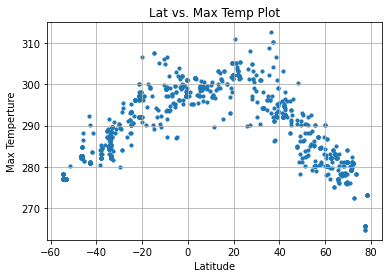

In [41]:
cities_df.plot.scatter("Lat", "Max Temp", s = 10)

plt.title('Lat vs. Max Temp Plot')
plt.xlabel('Latitude')
plt.ylabel('Max Temperture')
plt.grid()

## Latitude vs. Humidity Plot

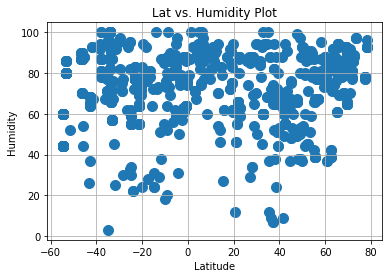

In [40]:
cities_df.plot.scatter("Lat", "Humidity", s = 100)

plt.title('Lat vs. Humidity Plot')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid()

## Latitude vs. Cloudiness Plot

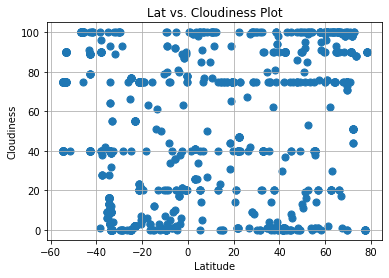

In [42]:
cities_df.plot.scatter("Lat", "Cloudiness", s = 50)

plt.title('Lat vs. Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid()

## Latitude vs. Wind Speed Plot

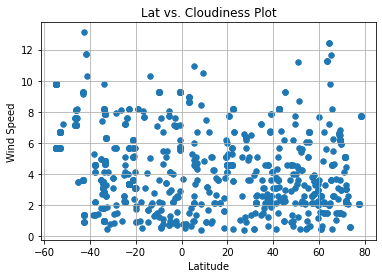

In [44]:
cities_df.plot.scatter("Lat", "Wind Speed", s = 30)

plt.title('Lat vs. Cloudiness Plot')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()

## Linear Regression

In [146]:
north_lat = cities_df.loc[(cities_df['Lat'] > 0)]
north_lat = north_lat.dropna()

south_lat = cities_df.loc[(cities_df['Lat'] < 0)]
south_lat = south_lat.dropna()

x_northlat = north_lat['Lat'].values.reshape(-1,1)
y_northtemp = north_lat['Max Temp'].values.reshape(-1,1)
x_northlat

array([[64.25],
       [17.02],
       [28.37],
       [42.6 ],
       [53.92],
       [69.22],
       [34.64],
       [26.59],
       [71.29],
       [62.46],
       [ 9.49],
       [72.79],
       [71.92],
       [47.86],
       [22.08],
       [62.46],
       [ 2.02],
       [57.79],
       [13.17],
       [42.16],
       [71.69],
       [19.22],
       [69.45],
       [71.04],
       [62.88],
       [17.02],
       [ 6.12],
       [77.48],
       [55.28],
       [ 4.32],
       [19.47],
       [57.05],
       [44.65],
       [71.29],
       [38.42],
       [37.1 ],
       [43.17],
       [50.35],
       [48.8 ],
       [31.49],
       [59.7 ],
       [69.45],
       [ 6.63],
       [32.32],
       [69.45],
       [55.61],
       [47.67],
       [38.52],
       [10.63],
       [ 1.55],
       [69.45],
       [ 3.07],
       [52.65],
       [19.22],
       [77.48],
       [71.29],
       [ 8.41],
       [49.59],
       [51.03],
       [51.59],
       [22.29],
       [ 0.54],
       [

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

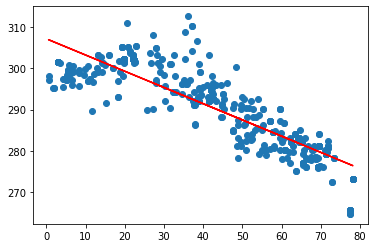

In [148]:
x_northlat = north_lat['Lat'].values.reshape(-1,1)
y_northtemp = north_lat['Max Temp'].values.reshape(-1,1)
x_northlat

linear_regressor = LinearRegression()
linear_regressor.fit(x_northlat, y_northtemp)
y_northtemp_pred = linear_regressor.predict(x_northlat)

plt.scatter(x_northlat, y_northtemp)
plt.plot(x_northlat, y_northtemp_pred, color='red')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

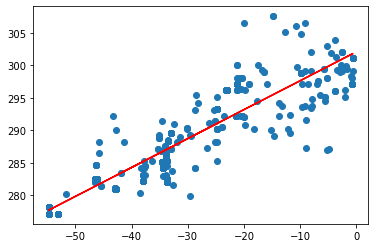

In [139]:
x = south_lat['Lat'].values.reshape(-1,1)
y = south_lat['Max Temp'].values.reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(x, y)
y_pred = linear_regressor.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

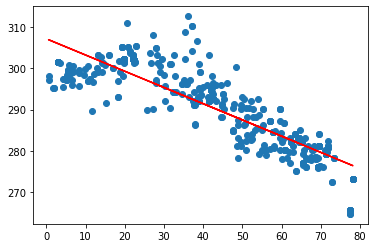

In [149]:
x_northlat = north_lat['Lat'].values.reshape(-1,1)
y_northhum = north_lat['Humidity'].values.reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(x_northlat, y_northtemp)
y_northtemp_pred = linear_regressor.predict(x_northlat)

plt.scatter(x_northlat, y_northtemp)
plt.plot(x_northlat, y_northtemp_pred, color='red')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

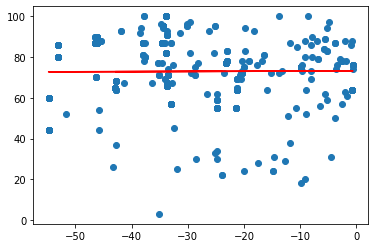

In [150]:
x_southlat = south_lat['Lat'].values.reshape(-1,1)
y_southhum = south_lat['Humidity'].values.reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(x_southlat, y_southhum)
y_southhum_pred = linear_regressor.predict(x_southlat)

plt.scatter(x_southlat, y_southhum)
plt.plot(x_southlat, y_southhum_pred, color='red')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

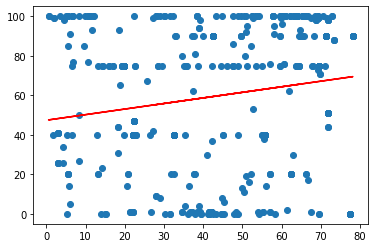

In [151]:
y_northcloud = north_lat['Cloudiness'].values.reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(x_northlat, y_northcloud)
y_northcloud_pred = linear_regressor.predict(x_northlat)

plt.scatter(x_northlat, y_northcloud)
plt.plot(x_northlat, y_northcloud_pred, color='red')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

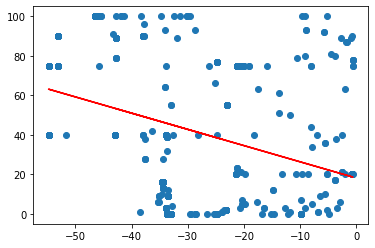

In [152]:
y_southcloud =south_lat['Cloudiness'].values.reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(x_southlat, y_southcloud)
y_southcloud_pred = linear_regressor.predict(x_southlat)

plt.scatter(x_southlat, y_southcloud)
plt.plot(x_southlat, y_southcloud_pred, color='red')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

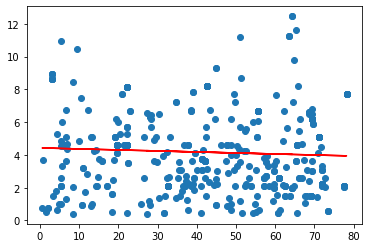

In [153]:
y_northwind =north_lat['Wind Speed'].values.reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(x_northlat, y_northwind)
y_northwind_pred = linear_regressor.predict(x_northlat)

plt.scatter(x_northlat, y_northwind)
plt.plot(x_northlat, y_northwind_pred, color='red')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

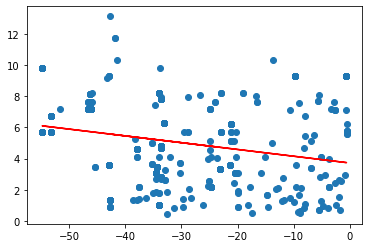

In [154]:
y_southwind =south_lat['Wind Speed'].values.reshape(-1,1)

linear_regressor = LinearRegression()
linear_regressor.fit(x_southlat, y_southwind)
y_southwind_pred = linear_regressor.predict(x_southlat)

plt.scatter(x_southlat, y_southwind)
plt.plot(x_southlat, y_southwind_pred, color='red')
plt.show()